# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# YOUR CODE HERE
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
# your solution here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# YOUR CODE HERE
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

.dtype attribute was used to explore Data Types:
- `City` column carries textual data. In Pandas, text data is stored as `object`.
- `State` column, similar to `City` is a text object.
- `Temperature` column contains numerical data with decimal points. Such data is stored as `float64`.

The `City` and `State` columns are suitable for categorical analysis, such as grouping or counting unique values.

The `Temperature` column is suitable for numerical analysis, such as calculating summary statistics (mean, median, standard deviation, etc.).

#### Select the rows where state is New York

In [5]:
# YOUR CODE HERE
temp_NY = temp[temp["State"] == "New York"]
temp_NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# YOUR CODE HERE
temp_NY_mean = temp_NY["Temperature"].mean()
print(f"The average temperature in New York is {temp_NY_mean.round(2)}.")

The average temperature in New York is 10.74.


#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp_15_plus = temp[temp['Temperature'] > 15]
temp_15_plus[["City", "State"]]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# YOUR CODE HERE
temp_15_plus[["City"]]

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# YOUR CODE HERE
temp_15_20 = temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]
temp_15_20[["City"]]

,City
0,NYC
3,Hartford


In [10]:
temp['State'].value_counts()

New York       3
Connecticut    2
New Jersey     2
Name: State, dtype: int64

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
# YOUR CODE HERE
state_stats = temp.groupby('State')['Temperature'].agg(['mean', 'std']).round(2)
state_stats

,mean,std
State,,
Connecticut,15.83,1.96
New Jersey,21.11,1.57
New York,10.74,8.13


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
# YOUR CODE HERE
employee = pd.read_csv("Employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
# YOUR CODE HERE
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

The columns `Name`, `Department`, `Education`, `Gender`, and `Title` carry textual data and are therefore of type `object`. These columns are suitable for categorical analysis such as grouping or counting unique values. 

The columns `Years` and `Salary` carry numerical discrete data, since they are of type `int64`. These columns are suitable for numerical analysis, such as calculating summary statistics (mean, median, standard deviation, etc.).

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

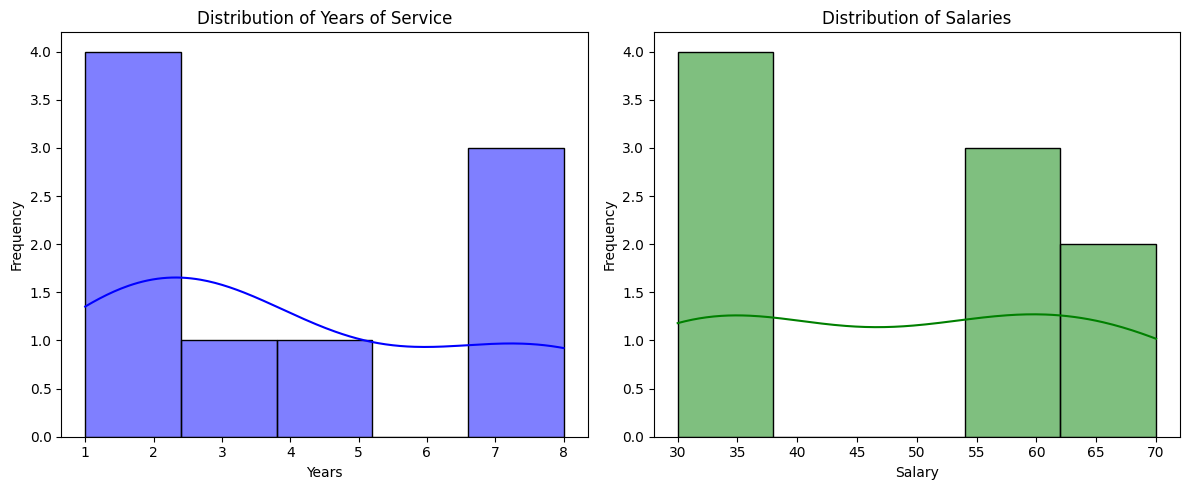

In [14]:
# YOUR CODE HERE
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Years
sns.histplot(employee['Years'], bins=5, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Years of Service')
axes[0].set_xlabel('Years')
axes[0].set_ylabel('Frequency')

# Histogram for Salary
sns.histplot(employee['Salary'], bins=5, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Salaries')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

`Years` and `Salary` are numerical variables and it makes sense to talk about their distribution. For each variable, the x-axis represents its range and the y-axis represents its frequency of occurrence.

Looking at `Years` distribution, it can be seen that most employees have 1 or 2 years of service. The next most frequent employees have 7 or 8 years of service. 

Looking at `Salary` distribution, it can be seen than most employees have smaller salaries (30 or 35), whilst the mid-level salaries (40 to 55) are absent the distribution. Moreover, the `Salary` distribution is declining which generally makes sense. 

#### What's the average salary in this company?

In [15]:
# YOUR CODE HERE
mean_salary = employee["Salary"].mean()
print(f"The mean salary is {mean_salary.round(2)}.")

The mean salary is 48.89.


#### What's the highest salary?

In [16]:
# YOUR CODE HERE
max_salary = employee["Salary"].max()
print(f"The highest salary is {max_salary.round(2)}.")

The highest salary is 70.


#### What's the lowest salary?

In [17]:
# YOUR CODE HERE
min_salary = employee["Salary"].min()
print(f"The lowest salary is {min_salary.round(2)}.")

The lowest salary is 30.


#### Who are the employees with the lowest salary?

In [18]:
# YOUR CODE HERE
# Filter employees with the minimum salary
employees_with_min_salary = employee[employee['Salary'] == min_salary]
employees_with_min_salary

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [19]:
# YOUR CODE HERE
# Filter employees with the name 'David'
employee_David = employee[employee["Name"] == "David"]
employee_David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [20]:
# YOUR CODE HERE
David_salary = employee_David["Salary"].values[0]
David_salary

30

#### Print all the rows where job title is associate

In [21]:
# YOUR CODE HERE
associates = employee[employee["Title"] == "associate"]
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [22]:
# YOUR CODE HERE
# Method 1: using .head()
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [23]:
# YOUR CODE HERE
# method 2: using slicing
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [24]:
# YOUR CODE HERE
# Filtering employees with Title = 'associate' and Salary > 55
associate_gt_55 = employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]
associate_gt_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [25]:
# YOUR CODE HERE
# Grouping by Years and calculating the average salary
mean_salary_per_year = employee.groupby("Years")[["Salary"]].mean().round(2)
mean_salary_per_year

,Salary
Years,
1,35.00
2,38.33
3,55.00
4,35.00
7,60.00
8,70.00


####  What is the average Salary per title?

In [26]:
# YOUR CODE HERE
mean_salary_per_title = employee.groupby("Title")[["Salary"]].mean().round(2)
mean_salary_per_title

,Salary
Title,
VP,70.00
analyst,32.50
associate,56.67


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

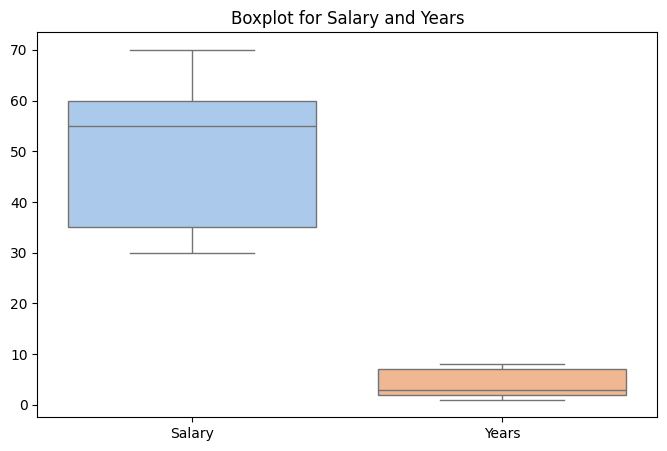

In [27]:
# YOUR CODE HERE

# Create boxplots for Salary and Years side by side
plt.figure(figsize=(8, 5))
sns.boxplot(data=employee[["Salary", "Years"]], palette="pastel")

# Calculate Quartiles for Salary
Q1_salary = employee["Salary"].quantile(0.25)
Q3_salary = employee["Salary"].quantile(0.75)

# Calculate Quartiles for Years
Q1_years = employee["Years"].quantile(0.25)
Q3_years = employee["Years"].quantile(0.75)

# Show the plot
plt.title("Boxplot for Salary and Years")
plt.show()

In [28]:
# print first quartile here
print(f"Salary - First Quartile (Q1): {Q1_salary}")
print(f"Years - First Quartile (Q1): {Q1_years}")

Salary - First Quartile (Q1): 35.0
Years - First Quartile (Q1): 2.0


In [29]:
# print third quartile here
print(f"Salary - Third Quartile (Q3): {Q3_salary}")
print(f"Years - Third Quartile (Q3): {Q3_years}")

Salary - Third Quartile (Q3): 60.0
Years - Third Quartile (Q3): 7.0


#### Is the mean salary per gender different?

In [30]:
# your answer here
# Grouping by gender and calculating the mean salary
mean_salary_by_gender = employee.groupby("Gender")["Salary"].mean()

# Printing the result
print(mean_salary_by_gender)

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


**As we can see, female employees earn slightly less than the male**

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [31]:
# your answer here

# Selecting only numeric columns
numeric_cols = ["Years", "Salary"]

# Grouping by Department and calculating min, mean, and max for numeric columns
stats_per_department = employee.groupby("Department")[numeric_cols].agg(["min", "mean", "max"])

# Printing the result
stats_per_department

Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Compute the difference between the max and min salary for each department
salary_diff = employee.groupby("Department")["Salary"].agg(lambda x: x.max() - x.min())

print(salary_diff)

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [33]:
# your answer here
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [34]:
# your answer here
# Check data types of each column
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [35]:
# your answer here
# Get the summary statistics of numeric columns
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


.dtype shows us the data type of each column in the orders dataset, which includes:
- `int64`: Integer values (InvoiceNo, year, month, day, hour, Quantity, CustomerID).
- `float64`: Float values (UnitPrice, amount_spent).
- `object`: String or categorical data (StockCode, Description, InvoiceDate, Country).

####  What is the average Purchase Price?

In [36]:
# your answer here

average_purchase_price = orders['amount_spent'].mean()
print(f"Average Purchase Price: {average_purchase_price:.2f}")

Average Purchase Price: 22.39


#### What were the highest and lowest purchase prices? 

In [37]:
# your answer here

# highest purchase price
highest_purchase_price = orders['amount_spent'].max()
print(f"Highest Purchase Price: {highest_purchase_price:.2f}")

Highest Purchase Price: 168469.60


In [38]:
# your answer here

# lowest purchase price
lowest_purchase_price = orders['amount_spent'].min()
print(f"Lowest Purchase Price: {lowest_purchase_price:.2f}")

Lowest Purchase Price: 0.00


#### Select all the customers we have in Spain

In [39]:
# your answer here

# customers in Spain
customers_in_spain = orders[orders['Country'] == 'Spain']
customers_in_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [40]:
# your answer here

# count of customers in Spain
customers_in_spain_count = customers_in_spain['CustomerID'].value_counts().count()
print(f"Number of customers in Spain: {customers_in_spain_count}")

Number of customers in Spain: 30


#### Select all the customers who have bought more than 50 items ?

In [41]:
# your answer here

# Customers with more than 50 bought items
customers_gt_50 = orders[orders['Quantity'] > 50]
print("Customers who bought more than 50 items:")
customers_gt_50.head()

Customers who bought more than 50 items:


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [42]:
# your answer here

# Select orders from Spain that are above 50 items
spain_orders_gt_50 = orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]
print("Orders from Spain with more than 50 items:")
spain_orders_gt_50.head()

Orders from Spain with more than 50 items:


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [43]:
# your answer here

# Select all free orders (where UnitPrice is 0)
free_orders = orders[orders['UnitPrice'] == 0]

# Display the free orders
print("Free Orders:")
free_orders.head()

Free Orders:


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [44]:
# your answer here

# Select all orders where the Description contains 'lunch bag' (case-insensitive)
lunch_bag_orders = orders[orders['Description'].str.contains('lunch bag', case=False, na=False)]

# Display the orders
print("Orders for 'lunch bag':")
lunch_bag_orders.head()

Orders for 'lunch bag':


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [45]:
# your answer here

# Select all orders made in 2011 with the description 'lunch bag'
lunch_bag_2011_orders = orders[
    (orders['year'] == 2011) & 
    (orders['Description'].str.contains('lunch bag', case=False, na=False))
]
# Display the orders
print("Orders for 'lunch bag' in 2011:")
lunch_bag_2011_orders.head()

Orders for 'lunch bag' in 2011:


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

In [46]:
# your answer here

# Frequency distribution table for amount_spent in Spain

# Filter the data for orders in Spain
spain_orders = orders[orders['Country'] == 'Spain']

# Generate the frequency distribution for the 'amount_spent' column
frequency_distribution_spain = spain_orders['amount_spent'].value_counts().sort_index()

frequency_distribution_spain

0.00       1
0.21       3
0.29       1
0.39       3
0.42       1
          ..
417.50     1
488.16     2
1080.00    1
1220.40    2
1350.00    3
Name: amount_spent, Length: 316, dtype: int64

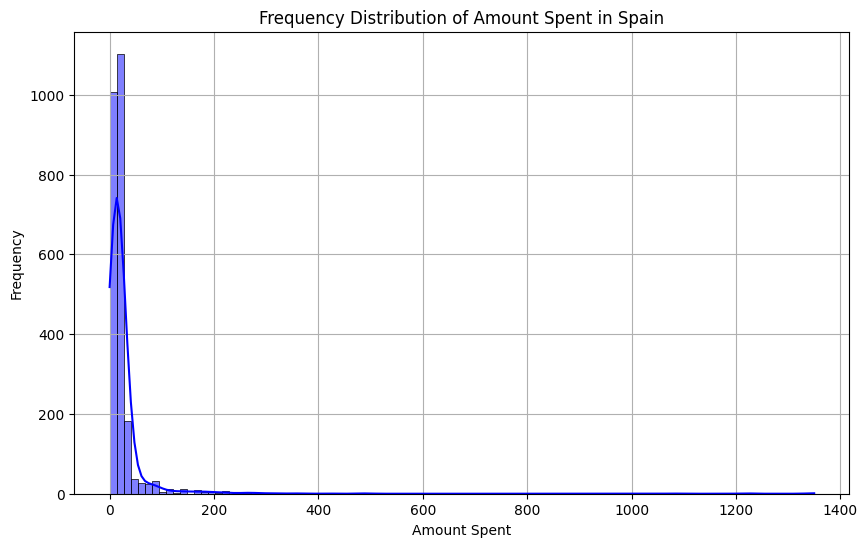

In [47]:
# Plot the frequency distribution of amount_spent in Spain

plt.figure(figsize=(10, 6))
sns.histplot(spain_orders['amount_spent'], bins=100, kde=True, color='blue')
plt.title('Frequency Distribution of Amount Spent in Spain')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Select all orders made in the month of August

In [48]:
# your answer here

# Filter orders made in the month of August (month == 8)
august_orders = orders[orders['month'] == 8]

# Display the filtered data
print("August orders:")
august_orders.head()

August orders:


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [49]:
# your answer here

# Get the frequency distribution of orders by country
orders_by_country_august = august_orders['Country'].value_counts()

# Display the result
print("Orders by country in August:")
orders_by_country_august

Orders by country in August:


United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [50]:
# your answer here

# Group the data by country and calculate the average amount spent
mean_amount_spent_by_country = orders.groupby('Country')[['amount_spent']].mean()

# Display the result
mean_amount_spent_by_country

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [51]:
# your answer here

# Find the row with the highest UnitPrice
most_expensive_item = orders.loc[orders['UnitPrice'].idxmax()]

# Display the most expensive item's details
print(f"The most expensive item is: {most_expensive_item['Description']}")
print(f"Unit Price: {most_expensive_item['UnitPrice']}")

The most expensive item is: postage
Unit Price: 8142.75


#### What was the average amount spent per year ?

In [52]:
# your answer here

# Group the data by year and calculate the average amount spent
average_amount_spent_per_year = orders.groupby('year')['amount_spent'].mean()

# Display the result
print(average_amount_spent_per_year)

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64
